In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,mean_squared_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.datasets import make_blobs
from tqdm import tqdm_notebook

In [2]:
class SigmoidNueron:
    def __init__(self):
        self.w=None
        self.b=None
    def perceptron(self,x):
        return np.dot(x, self.w.T)+self.b
    def sigmoid(self,x):
        return 1.0/(1.0+np.exp(-x))
    def grad_w_mse(self,x,y):
        y_pred=self.sigmoid(self.perceptron(x))
        return (y_pred-y)*y_pred*(1-y_pred)*x
    def grad_b_mse(self,x,y):
        y_pred=self.sigmoid(self.perceptron(x))
        return (y_pred-y)*y_pred*(1-y_pred)
    def grad_w_ce(self,x,y):
        y_pred=self.sigmoid(self.perceptron(x))
        if y==0:
            return y_pred*x
        elif y==1:
            return -1*(1-y_pred)*x
        else:
            raise ValueError("y should be 0 or 1")
    def grad_b_ce(self,x,y):
        y_pred=self.sigmoid(self.perceptron(x))
        if y==0:
            return y_pred
        elif y==1:
            return -1*(1-y_pred)
        else:
            raise ValueError("y should be 0 or 1")
            
    def fit(self,X,Y,epochs=1,learning_rate=1,initialise=True,loss_fn="mse",display_loss=False):
        if initialise:
            self.w=np.random.randn(1,X.shape[1])
            self.b=0
        if display_loss:
            loss={}
        for i in tqdm_notebook(range(epochs),total=epochs,unit="epoch"):
            dw=0
            db=0
            for x,y in zip(X,Y):
                if loss_fn=="mse":
                    dw+=self.grad_w_mse(x,y)
                    db+=self.grad_b_mse(x,y)
                elif loss_fn=="ce":
                    dw+=self.grad_w_ce(x,y)
                    db+=self.grad_b_ce(x,y)
            m=X.shape[1]   
            self.w-=learning_rate*dw/m
            self.b-=learning_rate*db/m
            if display_loss:
                Y_pred=self.sigmoid(self.perceptron(X))
                if loss_fn == "mse":
                    loss[i]=mean_squared_error(Y,Y_pred)
                elif loss_fn == "ce":
                    loss[i]=log_loss(Y,Y_pred)
        if display_loss:
            plt.plot(loss.values())
            plt.xlabel("Epochs")
            plt.ylabel("mse/ce")
            plt.show()
    def predict(self,X):
        Y_pred=[]
        for x in X:
            y_pred=self.sigmoid(self.perceptron(x))
            Y_pred.append(y_pred)
        return np.array(Y_pred)

In [3]:
data,labels=make_blobs(n_samples=1000,n_features=2,centers=4,random_state=0)

In [4]:
data.shape,labels.shape

((1000, 2), (1000,))

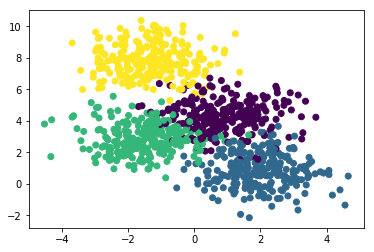

In [5]:
plt.scatter(data[:,0],data[:,1],c=labels)
plt.show()

In [6]:
label_orig=labels
labels=np.mod(label_orig,2)

In [7]:
X_train, X_val,Y_train,Y_val=train_test_split(data,labels,stratify=labels,random_state=0)
print(X_train.shape,X_val.shape)

(750, 2) (250, 2)


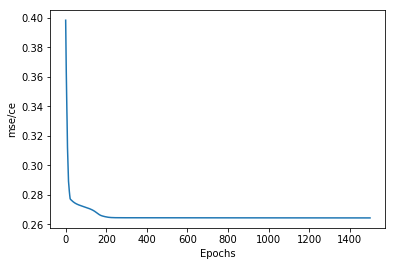

In [8]:
sn=SigmoidNueron()
sn.fit(X_train,Y_train,epochs=1500,learning_rate=0.25,display_loss=True)

In [9]:
Y_pred_train=sn.predict(X_train)

In [10]:
Y_train_binarized=(Y_pred_train>=0.5).astype("int").ravel()
Y_pred_val=sn.predict(X_val)
Y_val_binarized=(Y_pred_val>=0.5).astype("int").ravel()

In [11]:
acc_Y_train=accuracy_score(Y_train_binarized,Y_train)
acc_Y_val=accuracy_score(Y_val_binarized,Y_val)

In [12]:
print(round(acc_Y_train,2),round(acc_Y_val,2))


0.73 0.72


In [15]:
class FirstFFNetwork:

    def __init__(self):
        self.w1 = np.random.randn()
        self.w2 = np.random.randn()
        self.w3 = np.random.randn()
        self.w4 = np.random.randn()
        self.w5 = np.random.randn()
        self.w6 = np.random.randn()
        self.b1 = 0
        self.b2 = 0
        self.b3 = 0

    def sigmoid(self, x):
        
        return 1.0/(1.0 + np.exp(-x))

    def forward_pass(self, x):
        self.x1, self.x2 = x
        self.a1 = self.w1*self.x1 + self.w2*self.x2 + self.b1
        self.h1 = self.sigmoid(self.a1)
        self.a2 = self.w3*self.x1 + self.w4*self.x2 + self.b2
        self.h2 = self.sigmoid(self.a2)
        self.a3 = self.w5*self.h1 + self.w6*self.h2 + self.b3
        self.h3 = self.sigmoid(self.a3)
        return self.h3

    def grad(self, x, y):
        self.forward_pass(x)

        self.dw5 = (self.h3-y) * self.h3*(1-self.h3) * self.h1
        self.dw6 = (self.h3-y) * self.h3*(1-self.h3) * self.h2
        self.db3 = (self.h3-y) * self.h3*(1-self.h3)

        self.dw1 = (self.h3-y) * self.h3*(1-self.h3) * self.w5 * self.h1*(1-self.h1) * self.x1
        self.dw2 = (self.h3-y) * self.h3*(1-self.h3) * self.w5 * self.h1*(1-self.h1) * self.x2
        self.db1 = (self.h3-y) * self.h3*(1-self.h3) * self.w5 * self.h1*(1-self.h1)

        self.dw3 = (self.h3-y) * self.h3*(1-self.h3) * self.w6 * self.h2*(1-self.h2) * self.x1
        self.dw4 = (self.h3-y) * self.h3*(1-self.h3) * self.w6 * self.h2*(1-self.h2) * self.x2
        self.db2 = (self.h3-y) * self.h3*(1-self.h3) * self.w6 * self.h2*(1-self.h2)


    def fit(self, X, Y, epochs=1, learning_rate=1, initialise=True, display_loss=False):
        

        # initialise w, b
        if initialise:
            self.w1 = np.random.randn()
            self.w2 = np.random.randn()
            self.w3 = np.random.randn()
            self.w4 = np.random.randn()
            self.w5 = np.random.randn()
            self.w6 = np.random.randn()
            self.b1 = 0
            self.b2 = 0
            self.b3 = 0

        if display_loss:
            
            loss = {}

        for i in tqdm_notebook(range(epochs), total=epochs, unit="epoch"):
            
            dw1, dw2, dw3, dw4, dw5, dw6, db1, db2, db3 = [0]*9
            for x, y in zip(X, Y):
                self.grad(x, y)
                dw1 += self.dw1
                dw2 += self.dw2
                dw3 += self.dw3
                dw4 += self.dw4
                dw5 += self.dw5
                dw6 += self.dw6
                db1 += self.db1
                db2 += self.db2
                db3 += self.db3

            m = X.shape[1]
            self.w1 -= learning_rate * dw1 / m
            self.w2 -= learning_rate * dw2 / m
            self.w3 -= learning_rate * dw3 / m
            self.w4 -= learning_rate * dw4 / m
            self.w5 -= learning_rate * dw5 / m
            self.w6 -= learning_rate * dw6 / m
            self.b1 -= learning_rate * db1 / m
            self.b2 -= learning_rate * db2 / m
            self.b3 -= learning_rate * db3 / m

            if display_loss:
                Y_pred = self.predict(X)
                loss[i] = mean_squared_error(Y_pred, Y)

        if display_loss:
            plt.plot(loss.values())
            plt.xlabel('Epochs')
            plt.ylabel('Mean Squared Error')
            plt.show()

    def predict(self, X):
        Y_pred = []
        for x in X:
            y_pred = self.forward_pass(x)
            Y_pred.append(y_pred)
        return np.array(Y_pred)
    
    def predict_h1(self,X):
        Y_pred=[]
        for x in X:
            y_pred=self.forward_pass(x)
            Y_pred.append(self.h1)
        return np.array(Y_pred)
    
    def predict_h2(self,X):
        Y_pred=[]
        for x in X:
            y_pred=self.forward_pass(x)
            Y_pred.append(self.h2)
        return np.array(Y_pred)
    
    def predict_h3(self,X):
        Y_pred=[]
        for x in X:
            y_pred=self.forward_pass(x)
            Y_pred.append(self.h3)
        return np.array(Y_pred)

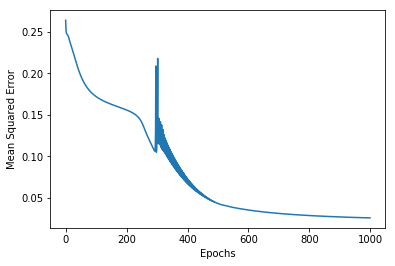

In [17]:
ffn=FirstFFNetwork()
ffn.fit(X_train,Y_train,epochs=1000,learning_rate=0.01,initialise=True,display_loss=True)

# Loss has significantly reduced when trained a ffNN than a sigmoid nueron


In [20]:
Y_pred_train=ffn.predict(X_train)
Y_pred_binarized_train=(Y_pred_train>=0.5).astype("int").ravel()
Y_pred_val=ffn.predict(X_val)
Y_pred_binarized_val=(Y_pred_val>=0.5).astype("int").ravel()
acc_train=accuracy_score(Y_pred_binarized_train,Y_train)
acc_val=accuracy_score(Y_pred_binarized_val,Y_val)
print(round(acc_train,2),round(acc_val,2))

0.98 0.94
